In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import numpy as np
import scipy.stats
import sys, os, re, csv
import seaborn
import pandas as pd
import loadBehavioralData as ld
import mpld3

%matplotlib inline
#plt.style.available # List of available plot styles
mpl.style.use('seaborn-colorblind')


In [2]:
animalName = "Gouda"
session = "Bouton_session106_220921.csv"
dataPath = "C:\\Users\\Quentin Gaucher\\data\\ENS behavior\\data"
filePath = os.path.join(dataPath,animalName,session)
figSize = (10,5)
intervalDur = 10

In [5]:
dataObj = ld.dataManage(filePath,True)
Trials = dataObj.getTrials()
goodTrials = dataObj.getGoodTrials()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Quentin Gaucher\\data\\ENS behavior\\data\\Gouda\\Bouton_session106_220921.csv'

In [ ]:
goodTrials[1].keys()

dict_keys(['stim', 'stim time', 'hit', 'correction trial', 'aborted', 'lickR', 'lickL', 'pokeR', 'pokeL', 'stimulus', 'gotReward', 'trialDuration', 'responseTime'])

## Plot session events

Text(0.5, 1.0, 'Trial by trial poke times')

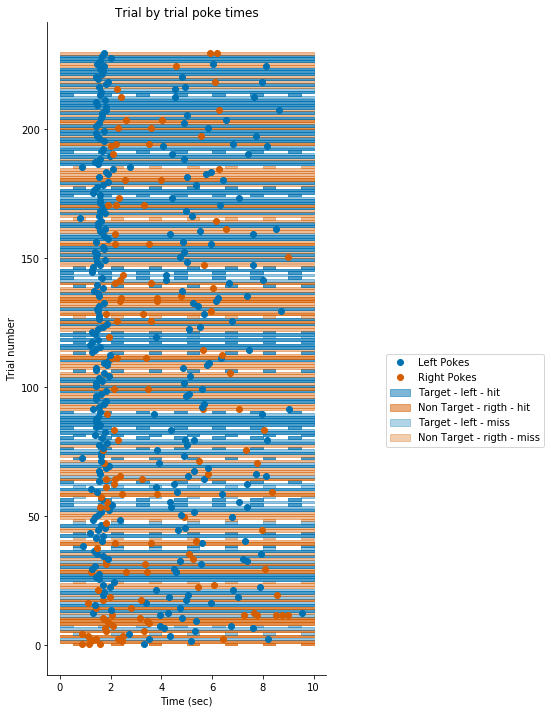

In [ ]:
# Align the licks to the central poke. 0 : Central poke, grey dots: Right licks, red dots: Left licks.
# Well trained animals should have a massed number of licks after 0, to the proper direction
# Color on 0 indicates target, red for left, grey for right

# trial = ['stim', c, 'stim time', stim_t[idx], 'hit', hit, 'correction trial', corr, 'lickR', RL, 'lickL', LL, 'pokeR', RP, 'pokeL', LP, 'isTrial',isTrial, 'TrialID', stimID]
clrs = seaborn.color_palette(n_colors=7)
h = plt.figure(figsize=(5,12))
N = 21
x = np.linspace(0,intervalDur,N)
w1 = (1,1,0) * (round(N/2)+3)
w1 = w1[0:N]
w2 = (0,1,1) * (round(N/2)+3)
w2 = w2[0:N]

#print(licktC)
#print(licktR)
for count,trial in enumerate(goodTrials):
    #print(count)
    RL = trial['pokeR']
    LL =  trial['pokeL']
    plt.plot(RL-trial['stim time'],[count+.5]*len(RL),'o',color=clrs[2])
    plt.plot(LL-trial['stim time'],[count+.5]*len(LL),'o',color=clrs[0],)
    if trial['correction trial']:
        hCol = plt.fill_between(x,count,count+.95,color=(0.5,0.5,0.5),alpha=.4,where=w1)
        #hCol = plt.fill_between(x,count,count+.95,color=(0.5,0.5,0.5),alpha=.5,where=not w1)
    elif trial['aborted']:
        hCol = plt.fill_between(x,count,count+.95,color=(0.5,0.5,0.5),alpha=.4,where=w2)
    else:
        hCol = plt.fill_between(x,count,count+.95,color=(0.5,0.5,0.5),alpha=.4)
    if trial['stim']==0: #and not trial['correction trial'] and not trial['aborted']:
        #hCol = plt.fill_between(x,count,count+.95,color=clrs[0],alpha=.5)
        hCol.set_color(clrs[0])
    elif trial['stim']==1: #and not trial['correction trial'] and not trial['aborted']:
        #hCol = plt.fill_between([0,intervalDur],count,count+.95,color=clrs[2],alpha=.5)
        hCol.set_color(clrs[2])
    if trial['hit'] == 1:
        hCol.set_alpha(0.7)

    #if trial['aborted']:
    #   plt.fill_between(x,count,count+.95,color=(0.5,0.5,0.5),alpha=.3,where=w)

plt.fill_between([0,0],0,0,color=clrs[0],alpha=.5,label = 'Target - left - hit')
plt.fill_between([0,0],0,0,color=clrs[2],alpha=.5,label = 'Non Target - rigth - hit')
plt.fill_between([0,0],0,0,color=clrs[0],alpha=.3,label = 'Target - left - miss')
plt.fill_between([0,0],0,0,color=clrs[2],alpha=.3,label = 'Non Target - rigth - miss')
#plt.fill_between([0,0],0,0,color=clrs[4],alpha=.3,label = 'Right trial')
#plt.fill_between([0,0],0,0,color=clrs[5],alpha=.3,label = 'Left trial')
plt.plot([],[],'o',color=clrs[0],label = 'Left Pokes')
plt.plot([],[],'o',color=clrs[2],label = 'Right Pokes')
plt.ylabel("Trial number")
plt.xlabel("Time (sec)")
seaborn.despine()
plt.legend(bbox_to_anchor=(1.8,0.5))
plt.title("Trial by trial poke times")
#plt.savefig('T2TlickTimes.pdf')

#plt.ylim(0,10)
# plt.xlim(0,3)
# for i in range(10):
#     print(allTrials[i])

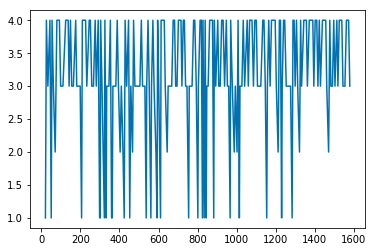

In [ ]:
y = list()
x = list()
for count,trial in enumerate(goodTrials):
    x.append(trial['stim time'])
    if trial['aborted']:
        y.append(1)
    elif trial['correction trial']:
        y.append(2)
    elif trial['hit'] == 0:
        y.append(3)
    elif trial['hit'] == 1:
        y.append(4)

plt.plot(x,y)


## Reaction time through session

In [ ]:
goodTrials[9]

{'stim': 1,
 'stim time': 86.3871,
 'hit': True,
 'correction trial': False,
 'aborted': False,
 'lickR': array([88.314, 88.45 , 89.329, 89.508, 89.812, 89.869, 89.998, 90.313]),
 'lickL': array([91.846, 92.008]),
 'pokeR': array([88.262, 89.827]),
 'pokeL': array([91.757]),
 'stimulus': 'african',
 'gotReward': 'right',
 'trialDuration': 6.563999999999993,
 'responseTime': 1.8748999999999967}

In [ ]:
dataObj.stim_names[9]

['african']

In [ ]:
import re

In [ ]:
re.findall("[0-9]{1,5}.[0-9]{0,5}([A-z ']*[0-9]*[A-z]*)",'sndList:111.1050solicit_005Aborted-120.3871pantherAborted-126.780solicit_005Aborted-130.010solicit_005')

['solicit_005Aborted', 'pantherAborted', 'solicit_005Aborted', 'solicit_005']

In [ ]:
gt = pd.pandas.DataFrame(goodTrials)
grouped = gt.groupby('aborted')

In [ ]:
gt['pokeL']

0                         [24.762]
1                         [31.609]
2                  [37.53, 42.233]
3                          [48.76]
4                         [53.811]
5                         [60.795]
6                 [66.238, 69.721]
7                  [75.359, 78.13]
8                               []
9                         [91.757]
10                        [97.757]
11                       [103.266]
12     [112.336, 115.264, 120.569]
13                       [127.111]
14                       [136.528]
15                       [139.184]
16              [145.938, 148.509]
17                       [154.652]
18               [160.137, 162.88]
19               [166.08, 169.442]
20                       [178.032]
21              [185.456, 188.484]
22              [191.877, 197.776]
23                       [201.019]
24                        [208.65]
25                       [211.837]
26                       [216.869]
27                       [222.167]
28                  

In [ ]:
import plotly.express as px
df = px.data.iris()

In [ ]:
gt = pd.DataFrame(goodTrials)

In [ ]:
gt

aborted  correction trial gotReward    hit  \
0       True             False      none   True   
1      False             False     right   True   
2      False             False      none  False   
3      False             False     right   True   
4       True             False      none  False   
5      False             False     right   True   
6      False             False      none  False   
7      False              True      none  False   
8      False             False     right   True   
9      False             False     right   True   
10     False             False     right   True   
11     False             False      none  False   
12     False             False      none  False   
13     False             False      left   True   
14     False             False     right   True   
15     False             False      left   True   
16     False             False      none  False   
17     False             False     right   True   
18     False             False      none  False   
19     False             False      none  False   
20     False             False      left   True   
21     False             False      none  False   
22     False             False      none  False   
23     False             False      none  False   
24      True             False      none  False   
25     False             False      left   True   
26     False             False      left   True   
27     False             False      left   True   
28     False             False     right   True   
29     False             False      none  False   
..       ...               ...       ...    ...   
200    False             False     right   True   
201    False             False      left   True   
202    False             False      none  False   
203    False             False     right   True   
204    False             False      left   True   
205    False             False      none  False   
206    False             False      left   True   
207    False             False      none  False   
208    False             False      left   True   
209    False             False      left   True   
210    False             False      left   True   
211    False             False      left   True   
212    False             False      none  False   
213    False              True      left   True   
214    False             False      left   True   
215    False             False      none  False   
216    False             False      none  False   
217    False             False      left   True   
218    False             False      none  False   
219    False             False      left   True   
220    False             False      none  False   
221    False             False      left   True   
222    False             False      left   True   
223    False             False      left   True   
224    False             False      none  False   
225    False             False      none  False   
226    False             False      left   True   
227    False             False      left   True   
228    False             False      left   True   
229    False             False      none  False   

                                                 lickL  \
0                                     [25.196, 25.251]   
1                             [31.708, 31.805, 32.337]   
2    [37.878, 37.935, 38.003, 38.164, 42.347, 42.44...   
3                                             [49.263]   
4                                      [53.924, 54.29]   
5                                                   []   
6    [66.626, 66.685, 69.822, 69.979, 70.03, 70.139...   
7                                     [75.527, 78.567]   
8                                                   []   
9                                     [91.846, 92.008]   
10                            [97.824, 98.038, 98.099]   
11                                           [103.365]   
12                          [112.62, 112.748, 112.815]   
13        [127.201, 127.354, 1